This file finds and graphs the frequencies of target words over time.

Author: Amy Weng 

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

directory = r'C:\Users\amycw\Desktop\ecbc research'
folder = directory+"\\"+'eebo_clean'
eicfile = directory + "\\" + 'eic_dated.csv'
monopolyfile = directory + "\\" + 'monopoly_dated.csv'

In [8]:
author = {} 
def authors(filename, start, end):
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            a = data.iloc[0].author
            if a not in author.keys(): 
                author[a] = 0
            author[a] += 1
    for k,v in sorted (author.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(k + ": " + str(v) + " ")

In [9]:
authors(eicfile,1660,1714)

no author: 116 
england and wales parliament: 15 
east india company: 11 
white samuel ca -: 5 
charles king of england -: 5 
seller john fl -: 4 
england and wales parliament house of commons: 4 
england and wales sovereign - william and mary: 3 
england and wales court of chancery: 3 
white george: 2 
washington joseph : 2 
wallis richard b ca : 2 
united provinces of the netherlands staten generaal: 2 
royal african company: 2 
r s: 2 
r : 2 
puckle james -: 2 
pollexfen henry sir - argument of a learned counsel upon an action of the case brought by the east-india-company against mr thomas sands an interloper: 2 
pollexfen henry sir - argument of a learned counsel upon an action of the case brought by the east-india-company: 2 
peck samuel: 2 
papillon thomas -: 2 
ogilby john -: 2 
oats titus -: 2 
le visor michel -: 2 
holes denzil holes baron -: 2 
h k: 2 
england and wales privy council: 2 
e h: 2 
dury giles editor: 2 
company of scotland trading to africa and the indies: 2 
co

In [ ]:
authors(monopolyfile,1660,1714)

In [ ]:
def titles(filename, start, end):
    titles = {} 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            t = data.iloc[0].title
            if t not in titles.keys(): 
                titles[t] = 0
            titles[t] += 1
    for pair in sorted (titles.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)
        print("\n")

In [ ]:
titles(eicfile, 1660,1714)

In [ ]:
def scatter(dates,freqs,title,color):
    xData = list(map(int, dates))
    yData = list(map(int, freqs))
    xyCoords=np.c_[xData,yData]
    uniquePoints, counts = np.unique(xyCoords, return_counts=True,axis=0)
    plt.scatter(uniquePoints[:,0],uniquePoints[:,1],s=counts*10,c=color,)

    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

In [ ]:
def scatter3D(dates, yFreq, zFreq, title, ylabel, zlabel,color):
    x = list(map(int, dates))
    y = list(map(int, yFreq))
    z = list(map(int, zFreq))

    plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(x, y, z, color = color)
    plt.title(title)
    ax.set_xlabel("Year", fontweight ='bold')
    ax.set_ylabel(ylabel, fontweight ='bold')
    ax.set_zlabel(zlabel, fontweight ='bold')
    plt.show()

In [18]:
def bar(xData,yData,title,xlabel,ylabel):
    if (xData == "Year"):
        xData = list(map(int, xData))
        yData = list(map(int, yData))
    plt.bar(xData,yData)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [ ]:
dates = []
freqs = []
freqDates = {}  
def freqOverTime(filename, word, start, end):
    count = 0 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            text = data.iloc[0].text
            if (re.search(word,text)!=None): 
                count += 1
                dates.append(date)
                freqs.append(len(re.findall(lexicon,text)))
                if date not in freqDates.keys(): 
                    freqDates[date] = 0
                freqDates[date] += 1
    print("The total number of texts is "+str(count))
    for pair in sorted (freqDates.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)

In [15]:
years = {} 
def findYears(filename,start,end):
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            if date not in years.keys(): 
                years[date] = 0
            years[date] += 1
    for pair in sorted (years.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)


In [16]:
findYears(eicfile)

(1695, 31)
(1698, 24)
(1693, 22)
(1700, 21)
(1699, 21)
(1696, 18)
(1691, 18)
(1689, 13)
(1692, 10)
(1681, 10)
(1697, 9)
(1694, 9)
(1680, 9)
(1676, 9)
(1641, 9)
(1677, 8)
(1672, 8)
(1660, 8)
(1615, 8)
(1690, 7)
(1682, 6)
(1663, 6)
(1628, 6)
(1623, 6)
(1688, 5)
(1685, 5)
(1684, 5)
(1673, 5)
(1669, 5)
(1659, 5)
(1650, 5)
(1644, 5)
(1624, 5)
(1622, 5)
(1618, 5)
(1675, 4)
(1666, 4)
(1662, 4)
(1640, 4)
(1635, 4)
(1674, 3)
(1668, 3)
(1667, 3)
(1661, 3)
(1657, 3)
(1654, 3)
(1652, 3)
(1636, 3)
(1630, 3)
(1621, 3)
(1620, 3)
(1619, 3)
(1687, 2)
(1683, 2)
(1679, 2)
(1665, 2)
(1664, 2)
(1658, 2)
(1653, 2)
(1651, 2)
(1649, 2)
(1647, 2)
(1645, 2)
(1643, 2)
(1642, 2)
(1626, 2)
(1625, 2)
(1701, 1)
(1678, 1)
(1670, 1)
(1656, 1)
(1648, 1)
(1646, 1)
(1639, 1)
(1633, 1)
(1627, 1)
(1608, 1)
(1602, 1)
(1593, 1)
(1560, 1)
(1532, 1)
(1022, 1)


In [ ]:
eic = re.compile("east india company|east-india company|east-india-company")
monopoly = re.compile('monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist|monopolizer|monopolize|monopolizes|monopolye|monopolyes')
lexicon = re.compile('free trade|private trade')

medical = re.compile("corruption|consumption|body politick|corrupt|consume|wasting|waste|blood|physician|decay|body|canker|cancer|disease|illness|remedy|cure|sickness|hepatitis|fever|spirit|brain|mind|vital|therapeutic|degeneration|degenerate|plague|smells|putrid|bad|tetrid|breathing|wholesome|healthy|unhealthy|sane|insane|nervous|languish|faculties|enfeeblement|drinks|tuberculosis|constitution|bile|black bile|yellow bile|phlegm|lung|sores|fog|smoke|diagnosis|prognosis|fiber|atrophy|morbid|mortal|mortality|nerves|inanition|defect|distemper|swelling|upset|stomach|cough|exercise|unwholesome|evacuation|fatal|fatality|vessels|hemmorrhage|bleeding|bleed|melancholy|diabetes|asthma|vomit|opiate|opium|ulcer|envy|jealousy|spoil|liver|vein|supple|heart|mouth|cured|pox")
economic = re.compile("economy|economic|oikonomike|household|price|prices|value|trade|traffic|traffique|money|bullion|exchange|luxury|spending|scarcity|plenty|east indies|corporation|west indies|carribean|india|corporation|company|merchant|merchants|plentitude|currency|calculation|public measure|consumables|superfluous|over-ballancing|over-balancing|impoverishing|gain|commerce|gold|silver|copper|ships|ship|debt|credit|debtor|creditor|decoctor|bank|usury|interest|rates|sugar|tobacco|beer|wool|uncharitable|charity|broker|monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist| monopolizer|monopolize|monopolizes|monopolye|monopolyes|importation|exportation|silk|coin|unnecessary|necessary|efficient|under-valuation|employment|immodest|immoderate|prodigality|austerity|excess|excessive|vital|artificial|goods|natural|cheap|expensive|victual|treasure|commodities|international|income|commodity|revenue|land|profitable|unprofitable|industry|work|ware|loss|transportation|balance|usurer|estate|corruptible|property|prosperity|substance|disturber|consumer|cloth|drapery|use|non-use|profusion|tea|spices|china|free trade|means|flourish")
political = re.compile("commonwealth|politick|politic|political|body politick|body politic|government|prince|war|ruler|king|queen|extortion|oppression|restoration|revolution|constitution|navy|military|army|strength|power|might|england|britain|ireland|netherlands|scotland|netherlands|dutch|spanish|germany|holy roman empire|mughal|christian|christianity|god|state|country|parliament|crisis|common|lords|lord|crisis|national|governor|public|publicke|low countries|controversy|controversies|authority|empire|bills|treatise|treatises|civilian|protection|pirates|pirate|civil war|massacre|indonesia|india|china|argier|tunis|kingdom|provincial|scandalous|scandal|majesty|subject|christiandom|enemy|turkish|ally")

# meed | mede | corrupt | corruption | bribe | bribery | presents | gifts | gifting | graft | gratuity | rewards | benefits | poison | extortion | favor | favour | gentle rewards | good turns | putrid | decay | dissolution | contamination | depravity | wickedness | corruptionem | corruptio | spoiling | seducing | destroy | seduce | perversion | vitiation | vitiare | impairment | vitium | vice | perverto | nabobs | nabob

In [ ]:
freqOverTime(eicfile,lexicon,1660,1714)

In [ ]:
scatter(dates,freqs,"Term frequencies of free/private trade in EIC texts 1660-1714","purple")

In [ ]:
bar(freqDates.keys(),freqDates.values(),"Term frequency of free/private trade in EIC texts 1660-1714","Year","Frequency")

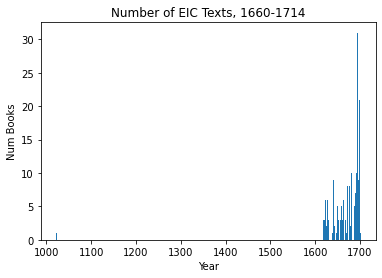

In [20]:
bar(years.keys(),years.values(),"Number of EIC Texts, 1660-1714","Year","Num Books")